In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import time

In [2]:
start_time = time.time()

In [3]:
voice=pd.read_csv('data/voice.csv')

In [4]:
voice.head(20)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [5]:
voice.isnull().sum()*100/voice.isnull().count()

meanfreq    0.0
sd          0.0
median      0.0
Q25         0.0
Q75         0.0
IQR         0.0
skew        0.0
kurt        0.0
sp.ent      0.0
sfm         0.0
mode        0.0
centroid    0.0
meanfun     0.0
minfun      0.0
maxfun      0.0
meandom     0.0
mindom      0.0
maxdom      0.0
dfrange     0.0
modindx     0.0
label       0.0
dtype: float64

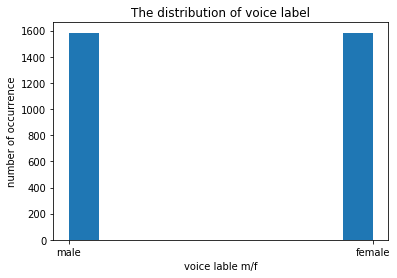

In [6]:
plt.hist(voice['label'])
plt.title("The distribution of voice label")
plt.xlabel("voice lable m/f")
plt.ylabel("number of occurrence")
plt.show()

In [7]:
list(voice.columns.values)

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

In [8]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
X=voice.iloc[:,:-1]
Y=voice.iloc[:,-1]

clf = DecisionTreeClassifier()
cross_val_score(clf, X, Y, cv=10)

array([0.90880503, 0.91823899, 0.97169811, 0.93396226, 0.96518987,
       0.98417722, 0.98734177, 0.9778481 , 0.91139241, 0.95886076])

In [9]:
# just do one time of decision and visualize it

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import time

In [11]:
from sklearn.model_selection import train_test_split


voice=pd.read_csv('data/voice.csv')
X=voice.iloc[:,:-1]
Y=voice.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% tes

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) # max_depth =3 gives the best result regarding accuracy

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.961093585699264


In [12]:
features=list(voice.columns.values)
features.pop()
features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [13]:
!set PATH=PATH;C:\Users\Yinan\Anaconda3\Lib\site-packages\graphviz\

In [14]:

'''from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import collections
from graphviz import Source
from IPython.display import SVG
from IPython.display import display


dot_data = tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features ,class_names=['male','female'])
graph = pydotplus.graph_from_dot_data(dot_data) 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')



graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=features, class_names=['male', 'female'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))'''

"from sklearn import tree\nfrom sklearn.tree import DecisionTreeClassifier, export_graphviz\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\nimport collections\nfrom graphviz import Source\nfrom IPython.display import SVG\nfrom IPython.display import display\n\n\ndot_data = tree.export_graphviz(clf, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = features ,class_names=['male','female'])\ngraph = pydotplus.graph_from_dot_data(dot_data) \ncolors = ('turquoise', 'orange')\nedges = collections.defaultdict(list)\nfor edge in graph.get_edge_list():\n    edges[edge.get_source()].append(int(edge.get_destination()))\n\nfor edge in edges:\n    edges[edge].sort()    \n    for i in range(2):\n        dest = graph.get_node(str(edges[edge][i]))[0]\n        dest.set_fillcolor(colors[i])\n\ngraph.write_png('tree.png')\n\n\n\ngraph = Source(tree.export_graphviz(clf, out_file=No

In [15]:
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 0.87238 seconds
